In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/Abandono_clientes.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


## Analise de colunas

### RowNumber

Apenas o index de cada linha, pode ser descartado da analise

In [5]:
del data['RowNumber']

### Customer ID

In [7]:
data['CustomerId'].value_counts()

15812607    1
15741078    1
15635776    1
15740223    1
15738174    1
           ..
15743714    1
15639265    1
15641312    1
15684319    1
15695872    1
Name: CustomerId, Length: 10000, dtype: int64

cada cliente tem uma linha unica de informacoes, so necessitariamos dessa coluna para ligar a algum outro dado que nao esteja na mesma linha do dataframe, portanto, podemos remover.

In [8]:
del data['CustomerId']

### Surname

Acredito que podem existir correla'c~oes entre determinado sobrenome e o output do modelo, mas se existir correla'c~ao, nao necessariamente existe causalidade. O que eu quero dizer 'e que, se a gente sabe que 70% dos Silvas da nossa base tem churn, como essa correlacao se tornaria uma causalidade, dado que existem varios 'Silvas' no Brasil, e a maioria nem pertence a mesma familia. No caso contr'ario, um sobrenome muito espec'ifico, pertencente a uma unica fam'ilia no pa'is por exemplo, teria uma baixa relevancia para o modelo

In [24]:
data['Surname'].value_counts()

Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Coffman       1
Enriquez      1
Mathews       1
Samaniego     1
Larson        1
Name: Surname, Length: 2932, dtype: int64

In [25]:
del data['Surname']

### CreditScore

Meu conhecimento sobre essa coluna 'e limitado a esse texto que encontrei sobre como funciona o credit score:

https://www.investopedia.com/terms/c/credit_score.asp

parece relevante, para o problema

In [26]:
data['CreditScore'].max()

850

In [27]:
data['CreditScore'].min()

350

como descrito no post, o maximo 'e 850 e o minimo 'e 350, temos os dois extremos presentes em nossa base

### Geography

parece util

In [29]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

### Gender

In [56]:
data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

### Age

Aqui, geralmente usam duas abordagens:
 - 1 - converter pra dados categoricos, usando faixas et'arias. e.g.: "18 - 29", "30 - 39"
 - 2 - converter pra valores continuos entre 0 e 1
    
provavelmente por praticidade converterei para valores continuos mesmo, nesse caso nao acho que faca muita diferenca 1 ou 2.

In [30]:
data['Age'].max()

92

In [31]:
data['Age'].min()

18

### Tenure

Pelo que pesquisei 'e um valor ligado a posse de imoveis, acredito que dados financeiros sao sempre interessantes para um problema de churn.

In [32]:
data['Tenure'].max()

10

In [34]:
data['Tenure'].min()

0

In [37]:
data['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

N~ao consigo entender se isso 'e o total de imoveis que a pessoa tem, ou se 'e um score de 0 a 10, essa distribuicao uniforme 'e no m'inimo curiosa. de qualquer forma isso virara um valor discreto entre 0 e 1 na entrada do modelo

## Balance

Saldo.

In [38]:
data['Balance'].max()

250898.09

In [39]:
data['Balance'].min()

0.0

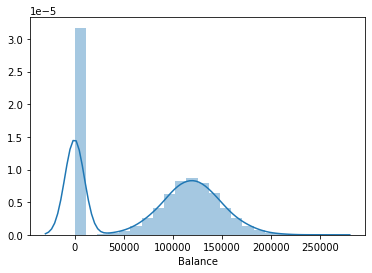

In [40]:
sns.distplot(data['Balance'])

In [41]:
len(data[data['Balance'] == 0])

3617

In [42]:
len(data[data['Balance'] != 0])

6383

curioso ver que o publico 'e dividido quase ao meio entre, pessoas que tem saldo, e pessoas sem saldo

### Num Of Products

In [47]:
data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

## Has Credit Card

In [48]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

## Is Active Member

In [49]:
data['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

### Estimated Salary

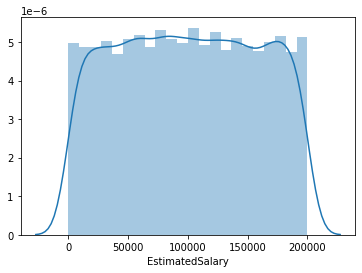

In [50]:
sns.distplot(data['EstimatedSalary'])

## Exited

In [53]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Usaremos downsampling no dataset para que len(data[data['Exited'] == 0]) == len(data[data['Exited'] == 1])

As colunas usadas na predi'c~ao s~ao:

In [55]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')